# OPER 685 Lesson 03 - Visualization and Data Wrangling
The intent of this Juptyer notebook is to provide a handful of Python code examples covering the fundementals of data visualization and data wrangling techniques.  

## 0. Import Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

We are going to be using the famous "hello world" dataset of Machine Learning, the Iris dataset.  This dataset contains 150 rows (instances) with 4 features (pedal width, pedal length, sepal width, and sepal length), and one response variable/truth label the species type.  

The dataset is commonly used to show how various clustering and classification techniques perform on a "simple" dataset.

In [2]:
iris = pd.read_csv("Iris.csv")
   
print (iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [3]:
#We don't need the ID column contained within the excel file.  
iris.drop('Id',axis=1,inplace=True)

In [4]:
iris.shape

(150, 5)

## 1.0 Visualization Techniques
We will cover a variety of the common visualization techniques using my favorite graphig tool Seaborn.  Bokeh is great too if you want interactive plots.  Matplotlib works, but has become somewhat dated compared to Seaborn.

### 1.1. Joint Plots
These figures plot two feastures against each other, and *also* show the distribtuion for each feature at the same time 

C:\Users\bcox\miniconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


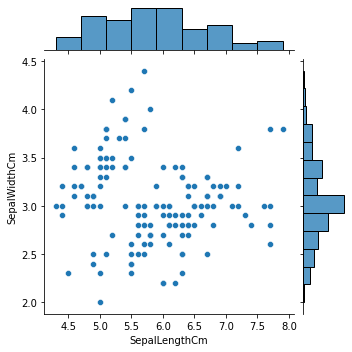

In [5]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,size=5)

Above figure is "okay" but it lacks *information density*.  The goal of good graphical design is to maximize the amount of information you provide the reader with the least amount of ink.  Let us see what happens when we add meaningful color.      

C:\Users\bcox\miniconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


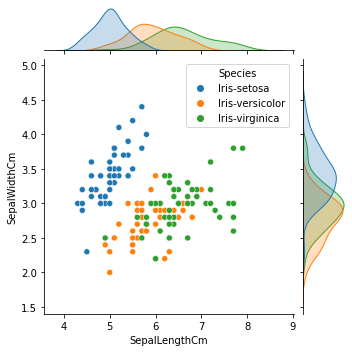

In [6]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,size=5, hue ="Species")

The result is **far** superior!  For the same amount of ink we are now providing at least 50% more information.

### Task:  Create a Jointplot that compares Pedal Length versus Pedal Width 

## 1.2 Scatter Plots

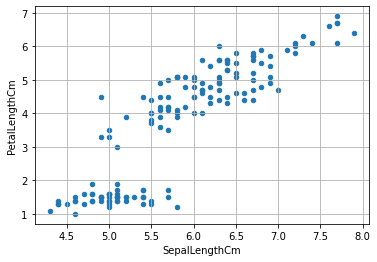

In [7]:
iris.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm')
plt.grid()

Same note as above adding appropriate color to a scatter plot adds a 3rd dimension of information to the 2D scatter plot. 

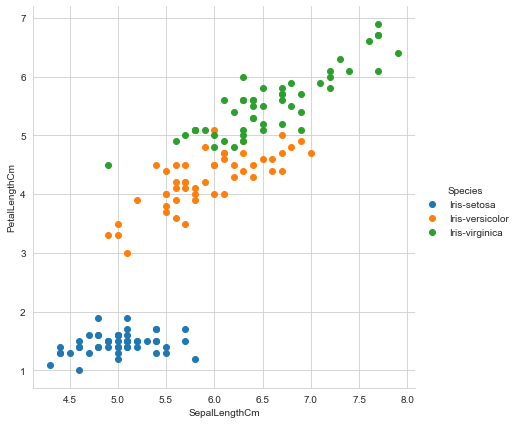

In [8]:
# If we want black graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
sns.FacetGrid(iris, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

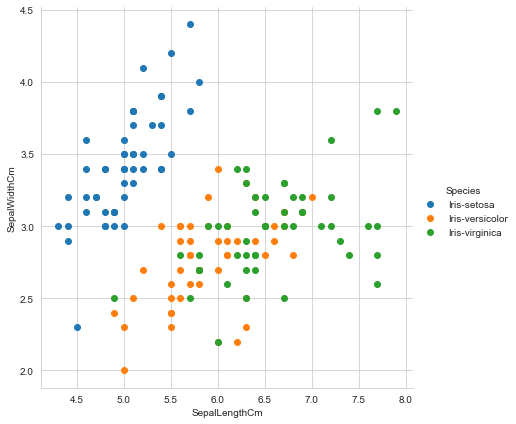

In [9]:
sns.FacetGrid(iris, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'SepalWidthCm').add_legend()

We can create any scatter plot we want, but wouldn't it be nice to create all the possible pairs at once?

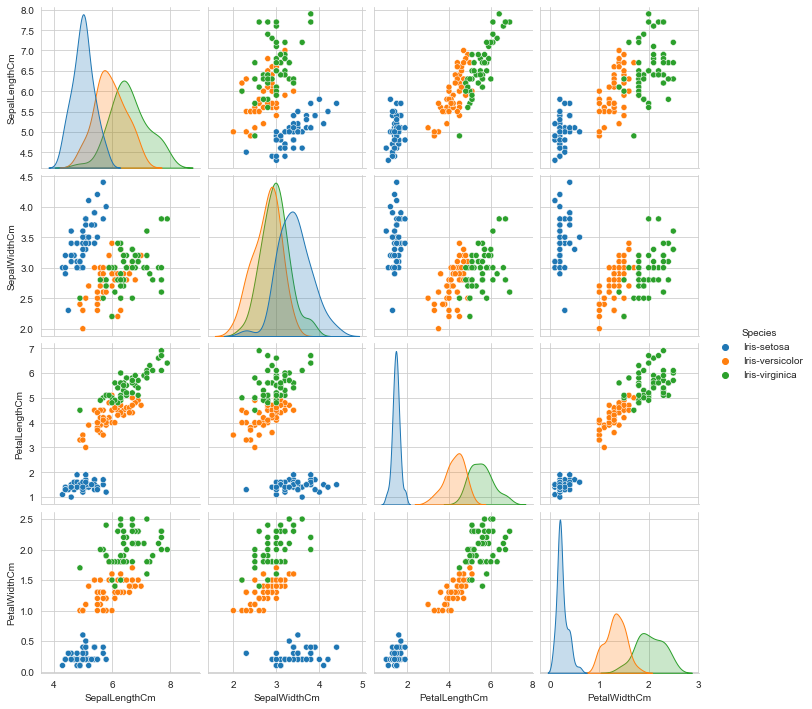

In [10]:
sns.pairplot(iris, hue='Species')

## 1.3 Box plots
https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

We can create simple box plots

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

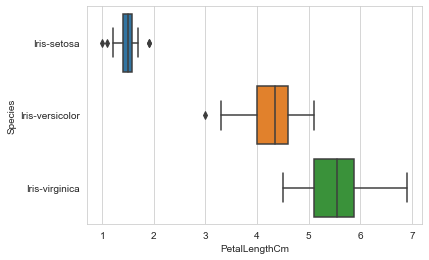

In [11]:
sns.boxplot(x='PetalLengthCm',y='Species',data=iris)

Complex box plots

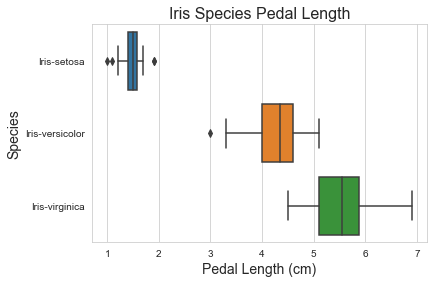

In [12]:
boxplot = sns.boxplot(x='PetalLengthCm',y='Species',data=iris, order=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
boxplot.axes.set_title("Iris Species Pedal Length", fontsize=16)
boxplot.set_xlabel("Pedal Length (cm)", fontsize=14)
boxplot.set_ylabel("Species", fontsize=14)
plt.show()

### Task: Create a boxplot where the species are along the x-axis, and the Sepal Width is measred on y axis

## 1.4 Strip plots
One issue with scatter plots is that if data is overlappping it can be hard to see.  Adding jitter is useful.

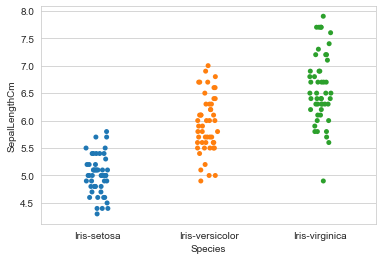

In [13]:
ax=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')

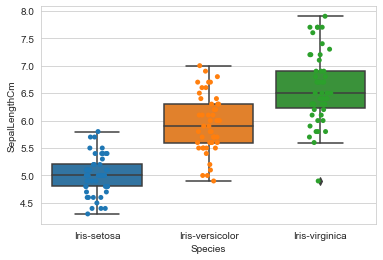

In [14]:
ax=sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
ax=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')

## 1.6 Correlation Heat Map
Each cell is the correlation of the intersection of the row feature with the column feature.

<AxesSubplot:>

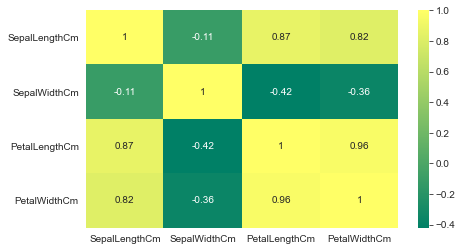

In [15]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')

### Task: Create a heatmap showing covariance for each cell

## 1.7 Distribution Histograms
https://seaborn.pydata.org/generated/seaborn.histplot.html


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Probability'>

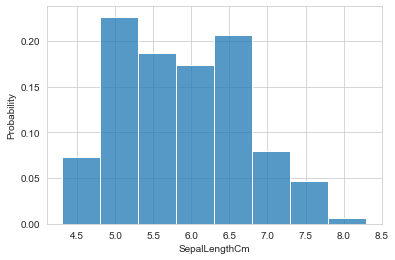

In [16]:
sns.histplot(data=iris, x = 'SepalLengthCm', stat = 'probability', binwidth = 0.5,)

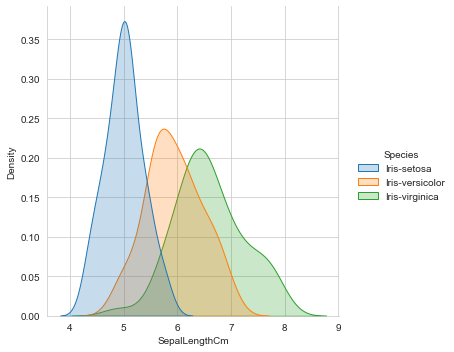

In [17]:
sns.displot(data=iris, x = 'SepalLengthCm', hue = "Species", kind = "kde", fill=True)

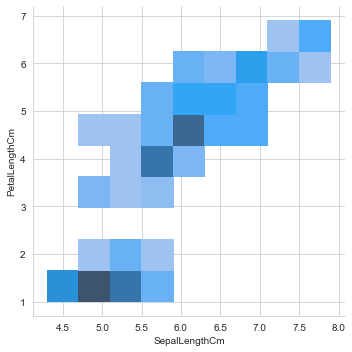

In [18]:
sns.displot(iris, x="SepalLengthCm", y="PetalLengthCm")

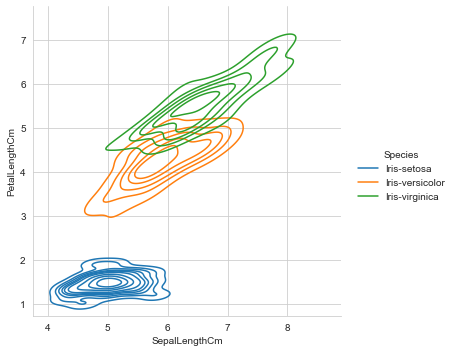

In [19]:
sns.displot(iris, x="SepalLengthCm", y="PetalLengthCm", kind="kde", hue="Species")

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color.  The kde=true option creates a line estimation.

### Task: Create a histogram for Sepal Length, change the bin width so the graph looks better and add a kernel density estimate line.